# Assignment 3 - Building a Custom Visualization

---

In this assignment you must choose one of the options presented below and submit a visual as well as your source code for peer grading. The details of how you solve the assignment are up to you, although your assignment must use matplotlib so that your peers can evaluate your work. The options differ in challenge level, but there are no grades associated with the challenge level you chose. However, your peers will be asked to ensure you at least met a minimum quality for a given technique in order to pass. Implement the technique fully (or exceed it!) and you should be able to earn full grades for the assignment.


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Ferreira, N., Fisher, D., & Konig, A. C. (2014, April). [Sample-oriented task-driven visualizations: allowing users to make better, more confident decisions.](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) 
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 571-580). ACM. ([video](https://www.youtube.com/watch?v=BI7GAs-va-Q))


In this [paper](https://www.microsoft.com/en-us/research/wp-content/uploads/2016/02/Ferreira_Fisher_Sample_Oriented_Tasks.pdf) the authors describe the challenges users face when trying to make judgements about probabilistic data generated through samples. As an example, they look at a bar chart of four years of data (replicated below in Figure 1). Each year has a y-axis value, which is derived from a sample of a larger dataset. For instance, the first value might be the number votes in a given district or riding for 1992, with the average being around 33,000. On top of this is plotted the 95% confidence interval for the mean (see the boxplot lectures for more information, and the yerr parameter of barcharts).

<br>
<img src="readonly/Assignment3Fig1.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Figure 1 from (Ferreira et al, 2014).</h4>

<br>

A challenge that users face is that, for a given y-axis value (e.g. 42,000), it is difficult to know which x-axis values are most likely to be representative, because the confidence levels overlap and their distributions are different (the lengths of the confidence interval bars are unequal). One of the solutions the authors propose for this problem (Figure 2c) is to allow users to indicate the y-axis value of interest (e.g. 42,000) and then draw a horizontal line and color bars based on this value. So bars might be colored red if they are definitely above this value (given the confidence interval), blue if they are definitely below this value, or white if they contain this value.


<br>
<img src="readonly/Assignment3Fig2c.png" alt="Figure 1" style="width: 400px;"/>
<h4 style="text-align: center;" markdown="1">  Figure 2c from (Ferreira et al. 2014). Note that the colorbar legend at the bottom as well as the arrows are not required in the assignment descriptions below.</h4>

<br>
<br>

**Easiest option:** Implement the bar coloring as described above - a color scale with only three colors, (e.g. blue, white, and red). Assume the user provides the y axis value of interest as a parameter or variable.


**Harder option:** Implement the bar coloring as described in the paper, where the color of the bar is actually based on the amount of data covered (e.g. a gradient ranging from dark blue for the distribution being certainly below this y-axis, to white if the value is certainly contained, to dark red if the value is certainly not contained as the distribution is above the axis).

**Even Harder option:** Add interactivity to the above, which allows the user to click on the y axis to set the value of interest. The bar colors should change with respect to what value the user has selected.

**Hardest option:** Allow the user to interactively set a range of y values they are interested in, and recolor based on this (e.g. a y-axis band, see the paper for more details).

---

*Note: The data given for this assignment is not the same as the data used in the article and as a result the visualizations may look a little different.*

In [1]:
%matplotlib notebook

#~~I chose the "Even Harder option"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.widgets as widgets
import math
from matplotlib import cm
from matplotlib import colors

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])
#~~Convert integer to year, why not? :D
df.index=pd.to_datetime(df.index,format='%Y').year
df=df.T
# dfmean = df.mean()
# print(df)
# print(df.describe())
# print(dfmean)

<IPython.core.display.Javascript object>


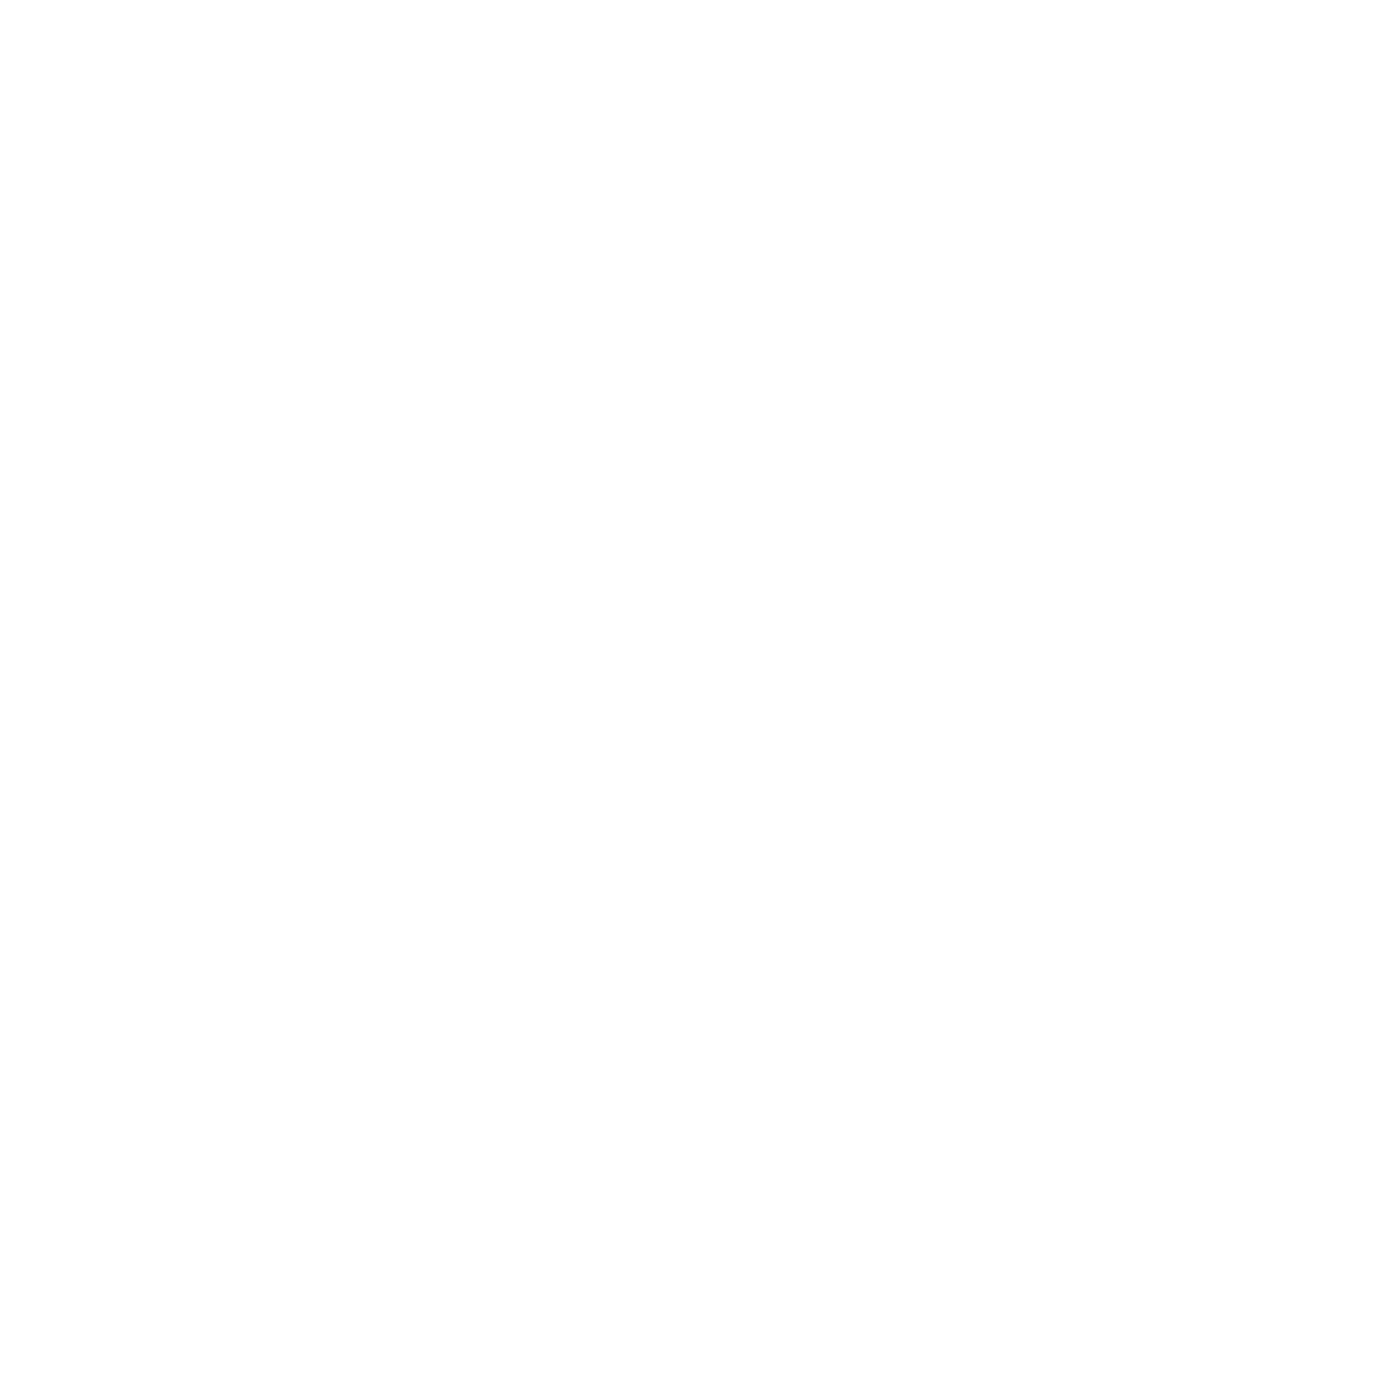

<IPython.core.display.Javascript object>


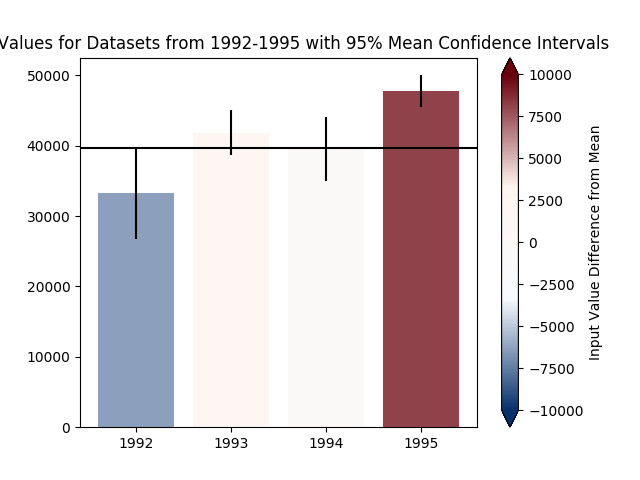

7

In [2]:
#~~I TURN THIS ONE IN FOR "HARDER"
conf_int_multi = 1.96 #~~From my stats handbook, a 95% confidence range around the mean translates to +/- 1.96 standard deviations around the mean
#~~SEM = standard deviation divided by the square root of the count of samples

yval = 35000

#~~Create the plot
plt.figure(figsize = (14,14))
fig,ax = plt.subplots()
#~~Create a list of the differences from the selected yval to the mean of the year
ydif = [(df[i].mean()-yval) for i in df.columns]
maxyabs = max(abs(i) for i in ydif)
#~~Original plan was to do some not-quite-normalizing but kinda normalizing of these ydif values, but chose not to
#     ydif1 = [ydif[i]/maxyabs for i in range(len(ydif))]

#~~Setting tick values, title
# plt.axhline(y=yval,color='black')
plt.xticks([1992,1993,1994,1995])
plt.title('Mean Values for Datasets from 1992-1995 with 95% Mean Confidence Intervals')
#~~Adding initial horizontal line
plt.axhline(y=yval,color='black')
#~~Creating different custom colormaps depending on if the y axis value of interest is between, above, or below all of the means
if min(ydif)>0:    
    colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Reds(0),cm.Reds(abs(max(ydif)))])
elif max(ydif)<0:
    colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Blues(abs(max(ydif))),cm.Blues(0)])
else:
    colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Blues(abs(max(ydif))),cm.Blues(0),cm.Reds(0),cm.Reds(abs(max(ydif)))])

#~~Creating color bar with color scaled to the colormap and an initial range of -10000 to 10000
normalize = colors.Normalize(vmin=-10000, vmax=10000)
scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
scalarmappaple.set_array(ydif)

cbar=plt.colorbar(scalarmappaple,label='Input Value Difference from Mean',extend='both')
#~~Was going to try to customize the ticks, but couldn't get it to work dynamically like I wanted
# cbar=plt.colorbar(scalarmappaple,label='Input Value Difference from Mean',ticks=[-10000,-5000,0,5000,10000])
# cbar.ax.set_yticklabels(['<= -10,000','-5,000','0','5,000','>= 10,000'])
#~~Create a list of colors with the ydif values
colorlist = []
for i in ydif:
    colorlist.append(scalarmappaple.to_rgba(i))
    #~~Old method that became obsolete with the static colorbar range
#     if abs(i) == 0:
#         colorlist.append('White')
#     if i < 0:
#         colorlist.append(scalarmappaple.to_rgba(i))
#     else:
#         colorlist.append(scalarmappaple.to_rgba(i))
#~~Plot the bars with the colors
plt.bar([1992,1993,1994,1995],[df[1992].mean(),df[1993].mean(),df[1994].mean(),df[1995].mean()],
        yerr=[df[1992].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1993].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1994].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1995].std()*conf_int_multi/math.sqrt(len(df[1992]))],
        color = colorlist)


def onclick(event):
    #~~Wipe the plot
    fig.clear()
    #~~Store the yclick data
    yclick=event.ydata
    yval = yclick
    #~~Create a list of the differences from the selected yval to the mean of the year
    ydif = [(df[i].mean()-yval) for i in df.columns]
    maxyabs = max(abs(i) for i in ydif)
    #~~Again chose not to do this, but was originally going to do some not-quite-normalizing but kinda normalizing of these ydif values
#     ydif1 = [ydif[i]/maxyabs for i in range(len(ydif))]


    #~~Setting ticks and title again
    plt.xticks([1992,1993,1994,1995])
    plt.title('Mean Values for Datasets from 1992-1995 with 95% Mean Confidence Intervals')
    plt.axhline(y=yval,color='black')

    #~~Creating different custom colormaps depending on if the y axis value of interest is between, above, or below all of the means
    #~~Also modifying the noramilze dependong in this to adjust the colorbar range
    if min(ydif)>0:    
        colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Reds(0),cm.Reds(abs(max(ydif)))])
        normalize = colors.Normalize(vmin=0, vmax=10000)
    elif max(ydif)<0:
        colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Blues(abs(max(ydif))),cm.Blues(0)])
        normalize = colors.Normalize(vmin=-10000, vmax=0)
    else:
        colormap=colors.LinearSegmentedColormap.from_list('asd',[cm.Blues(abs(max(ydif))),cm.Blues(0),cm.Reds(0),cm.Reds(abs(max(ydif)))])
        normalize = colors.Normalize(vmin=-10000, vmax=10000)

    #~~Creating color bax
    scalarmappaple = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappaple.set_array(ydif)
#     plt.colorbar().cla()
    cbar=plt.colorbar(scalarmappaple,label='Input Value Difference from Mean',extend='both')
    #~~Was messing around with customized, dynamic ticks but couldn't get it to work
#     cbar.set_clim(-20000,20000)
#     cbar=plt.colorbar(scalarmappaple,label='Input Value Difference from Mean',ticks=[-10000,-5000,0,5000,10000])
#     cbar.ax.set_yticklabels(['<= -10,000','-5,000','0','5,000','>= 10,000'])
    #~~Create a list of colors with the ydif values
    colorlist = []
    for i in ydif:
        colorlist.append(scalarmappaple.to_rgba(i))
        #~~Old method that became obsolete with the static colorbar range
#     for i in ydif:
#         if abs(i) == 0:
#             colorlist.append('White')
#         if i < 0:
#             colorlist.append(scalarmappaple.to_rgba(i))
#         else:
#             colorlist.append(scalarmappaple.to_rgba(i))
    plt.bar([1992,1993,1994,1995],[df[1992].mean(),df[1993].mean(),df[1994].mean(),df[1995].mean()],
            yerr=[df[1992].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1993].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1994].std()*conf_int_multi/math.sqrt(len(df[1992])),df[1995].std()*conf_int_multi/math.sqrt(len(df[1992]))],
            color = colorlist)

plt.gcf().canvas.mpl_connect('button_press_event', onclick)

